<a href="https://colab.research.google.com/github/Coder-Jdo/Playstore-App-Data-Analysis/blob/main/Playstore_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -    Play Store App Market Competition & Saturation Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 - Abhishek**


# **Project Summary -**

Write the summary here within 500-600 words.

The Google Play Store hosts millions of apps, but not all categories offer equal opportunity.
Many developers fail because they enter oversaturated categories where competition is high and visibility is low.

* This project helps new app developers, startups, and product managers identify:

* Saturated categories (high competition, low return)

* Underserved categories (low competition, high demand)

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To analyze Google Play Store data and identify saturated and underexplored app categories by evaluating the relationship between number of apps, user installs, and ratings, enabling developers to make data-driven decisions before launching new apps.

#### **Define Your Business Objective?**

* Measure market saturation across app categories

* Identify high-demand, low-competition opportunities

* Reduce risk for new app launches

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1 = '/content/drive/MyDrive/Play Store Data.csv'
path2 = '/content/drive/MyDrive/User Reviews.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

### Dataset First View

In [4]:
# Dataset First Look
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df1.shape

(10841, 13)

In [7]:
df2.shape

(64295, 5)

### Dataset Information

In [8]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated(subset = 'App')])

1181

In [11]:
len(df2[df2.duplicated()])

33616

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count

In [13]:
print(df1.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [14]:
print(df2.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


<Axes: >

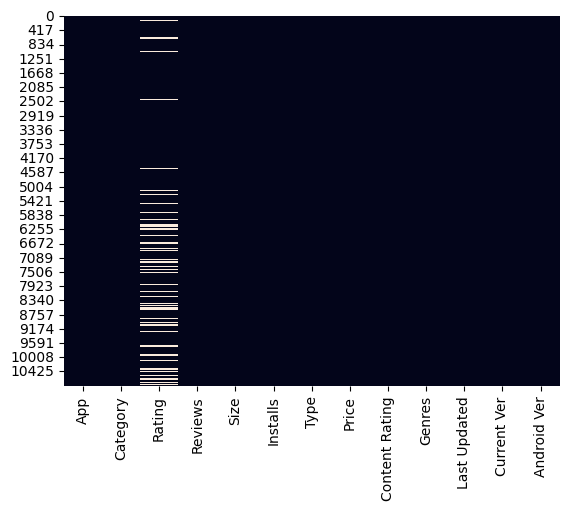

In [15]:
# Visualizing the missing values
sns.heatmap(df1.isnull(), cbar=False)

<Axes: >

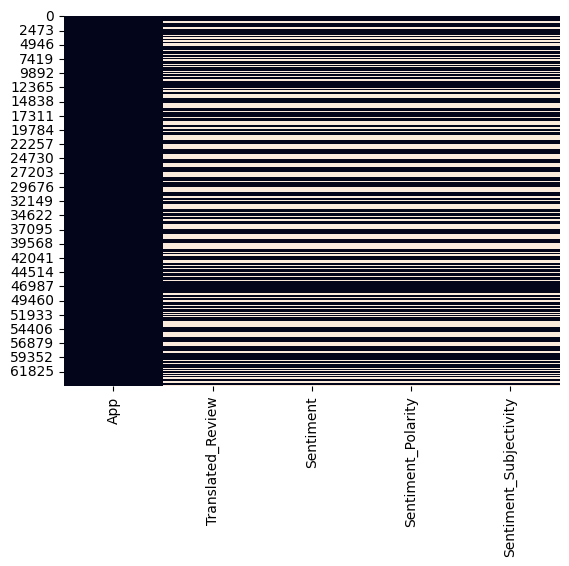

In [16]:
sns.heatmap(df2.isnull(), cbar=False)

### What did you know about your dataset?

The Dataset i have is of Google Play store ecosystem which gives us insights on understanding market competition, app category saturation, and factors influencing app success, such as installs, ratings, reviews, pricing, and app type.

Market Competition & Saturation Analysis helps identify overcrowded app categories, emerging opportunities, and competitive gaps where new apps can perform better. This analysis supports developers and businesses in making data-driven decisions before launching or improving an app.

The PlayStore App Dataset has 10841 Rows and 13 Columns with 483 missing/NULL values

The User Review Dataset has 64295 Rows and 5 Columns with 33616 missing/NULL values


## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [18]:
df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [19]:
# Dataset Describe
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [20]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### Variables Description

1) App Store Data Base :-
* App :- Name of the app
* Category :- Category or genere of the App
* Rating :- Customer Rating out of 5
* Reviews :- Customer review of the App
* Size :- Size of the App (M = MB, G= GB)
* Installs :- Number of Installs
* Type :- Free or Paid
* Price :- If Paid then pricing of the App
* Content Rating :- Target Audience or Age group of the App
* Genres :- Genres of the App
* Last Updated :- Date When the App was last updated
* Current Ver :- Current App Version
* Android Ver :- Supported Android Version


2.) User review Data Set :-
* App :- Name of the App
* Translated_Review :- Review of the App
* Sentiment :- Sentiment of the Review (Positive/Negative)
* Sentiment_Polarity :- How much that Sentiment is Polar to its Reviews
* Sentiment_Subjectivity :- How much that Sentiment is Subjective to its Review





### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
   print("No. of unique values in ",i,"is",df1[i].nunique())

No. of unique values in  App is 9660
No. of unique values in  Category is 34
No. of unique values in  Rating is 40
No. of unique values in  Reviews is 6002
No. of unique values in  Size is 462
No. of unique values in  Installs is 22
No. of unique values in  Type is 3
No. of unique values in  Price is 93
No. of unique values in  Content Rating is 6
No. of unique values in  Genres is 120
No. of unique values in  Last Updated is 1378
No. of unique values in  Current Ver is 2832
No. of unique values in  Android Ver is 33


In [22]:
for i in df2.columns.tolist():
   print("No. of unique values in ",i,"is",df2[i].nunique())

No. of unique values in  App is 1074
No. of unique values in  Translated_Review is 27994
No. of unique values in  Sentiment is 3
No. of unique values in  Sentiment_Polarity is 5410
No. of unique values in  Sentiment_Subjectivity is 4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# # Write your code to make your dataset analysis ready.

In [24]:
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

The Data in Installs contains values such as "FREE" which have no numeric significance, So i Treated them as Missing Values for Better data Insight.


In [25]:
df1['Install_clean'] = (
    df1['Installs']
    .replace('Free', pd.NA)
    .str.replace('[+,]', '', regex=True)
    .pipe(pd.to_numeric, errors='coerce')
)

In [26]:
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

The Price column contained invalid non-price entries due to dataset inconsistencies. Such values were treated as missing and excluded from pricing analysis to avoid incorrect monetization insights

In [27]:
df1['Price_clean'] = (
    df1['Price']
    .replace('Everyone', pd.NA)
    .str.replace('$', '', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)

In [28]:
df1['Reviews_clean'] = df1['Reviews'].pipe(pd.to_numeric, errors='coerce')
df1['Reviews_clean']

,Reviews_clean
0,159.0
1,967.0
2,87510.0
3,215644.0
4,967.0
...,...
10836,38.0
10837,4.0
10838,3.0
10839,114.0


User review counts were converted to numeric format using safe type coercion. Non-numeric values were treated as missing to preserve the integrity of engagement analysis.

In [29]:
s = df1['Size'].str.lower().str.strip()
size_mb = pd.Series(np.nan, index=s.index)
mask_m = s.str.endswith('m', na = False)
size_mb[mask_m] = (
    pd.to_numeric(s[mask_m].str[:-1], errors = 'coerce')
)
mask_k = s.str.endswith('k', na = False)
size_mb[mask_k] = (
    pd.to_numeric(s[mask_k].str[:-1], errors='coerce') / 1024)
df1['Size_MB'] = size_mb


App size values were standardized to megabytes (MB). Sizes expressed in kilobytes were converted accordingly, while ambiguous or invalid values such as ‘Varies with device’ were treated as missing

In [30]:
df1['Last_updated_dt'] = pd.to_datetime(df1['Last Updated'], errors = 'coerce')


The ‘Last Updated’ column contained inconsistent and invalid entries. Dates were parsed using safe coercion, and invalid values were treated as missing to ensure accurate recency analysis.

In [31]:
ref = df1['Last_updated_dt'].max()
df1['Days_since_updated'] = ref - df1['Last_updated_dt']
df1['Days_since_updated'].head()

,Days_since_updated
0,213 days
1,205 days
2,7 days
3,61 days
4,49 days


A recency metric (‘Days Since Last Update’) was computed using the most recent update date in the dataset as reference, enabling comparison of maintenance activity across apps and categories.

In [32]:
df1['App'].duplicated().sum()

np.int64(1181)

In [33]:
df1 = df1.sort_values(['Last_updated_dt', 'Reviews_clean'], ascending=[False, False]).drop_duplicates(subset = 'App', keep = 'first')

In [34]:
df1['App'].duplicated().sum()

np.int64(0)

In [35]:
df1['Category'].value_counts(ascending=False)

,count
Category,
FAMILY,1874
GAME,946
TOOLS,829
BUSINESS,419
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


The dataset contained a corrupted record where a numeric value appeared in the Category column due to source misalignment. Such rows were removed to ensure valid category-level market analysis.

In [36]:
df1 = df1.drop(df1[df1['Category'] == '1.9'].index)

In [37]:
df1['Category'].value_counts(ascending=False)

,count
Category,
FAMILY,1874
GAME,946
TOOLS,829
BUSINESS,419
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [38]:
df1.groupby('Category')['Install_clean'].sum()

,Install_clean
Category,
ART_AND_DESIGN,1.132381e+08
AUTO_AND_VEHICLES,5.313021e+07
BEAUTY,2.719705e+07
BOOKS_AND_REFERENCE,1.665970e+09
BUSINESS,6.921649e+08
COMICS,4.498115e+07
COMMUNICATION,1.103928e+10
DATING,1.409251e+08
EDUCATION,1.899520e+08


In [39]:
df1.groupby('Category')['Install_clean'].median()

,Install_clean
Category,
ART_AND_DESIGN,100000.0
AUTO_AND_VEHICLES,100000.0
BEAUTY,50000.0
BOOKS_AND_REFERENCE,10000.0
BUSINESS,1000.0
COMICS,100000.0
COMMUNICATION,100000.0
DATING,10000.0
EDUCATION,1000000.0


In [40]:
category_summ = (df1.groupby('Category').agg(
    app_count = ('App' , 'count'),
    Total_install = ('Install_clean', 'sum'),
    Avg_intall = ('Install_clean', 'mean'),
    Median_install = ('Install_clean', 'median'),
    Avg_Rating = ('Rating','mean')
).reset_index())

In [41]:
category_summ['Average installs per app'] = (
    category_summ['Total_install'] / category_summ['app_count']
)

In [42]:
category_summ.sort_values(
    'Median_install',
    ascending=False
).head(10)


,Category,app_count,Total_install,Avg_intall,Median_install,Avg_Rating,Average installs per app
8,EDUCATION,107,1.899520e+08,1.775252e+06,1000000.0,4.354717,1.775252e+06
26,SHOPPING,202,1.400349e+09,6.932420e+06,1000000.0,4.230556,6.932420e+06
9,ENTERTAINMENT,87,9.896600e+08,1.137540e+07,1000000.0,4.129885,1.137540e+07
14,GAME,946,1.345792e+10,1.422614e+07,1000000.0,4.244605,1.422614e+07
24,PHOTOGRAPHY,281,4.658148e+09,1.657704e+07,1000000.0,4.156654,1.657704e+07
31,VIDEO_PLAYERS,164,3.931903e+09,2.397502e+07,1000000.0,4.044966,2.397502e+07
32,WEATHER,79,3.611005e+08,4.570893e+06,1000000.0,4.243056,4.570893e+06
16,HOUSE_AND_HOME,73,9.720246e+07,1.331541e+06,500000.0,4.140984,1.331541e+06
13,FOOD_AND_DRINK,112,2.117988e+08,1.891060e+06,300000.0,4.171277,1.891060e+06
0,ART_AND_DESIGN,61,1.132381e+08,1.856362e+06,100000.0,4.359322,1.856362e+06


Category-level competition and demand metrics were computed using grouped aggregations. An opportunity score was derived to identify high-demand, low-competition app categories.

To reduce the influence of outlier apps, median installs per app were analyzed alongside mean installs, providing a more realistic view of typical app performance within each category.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Category')

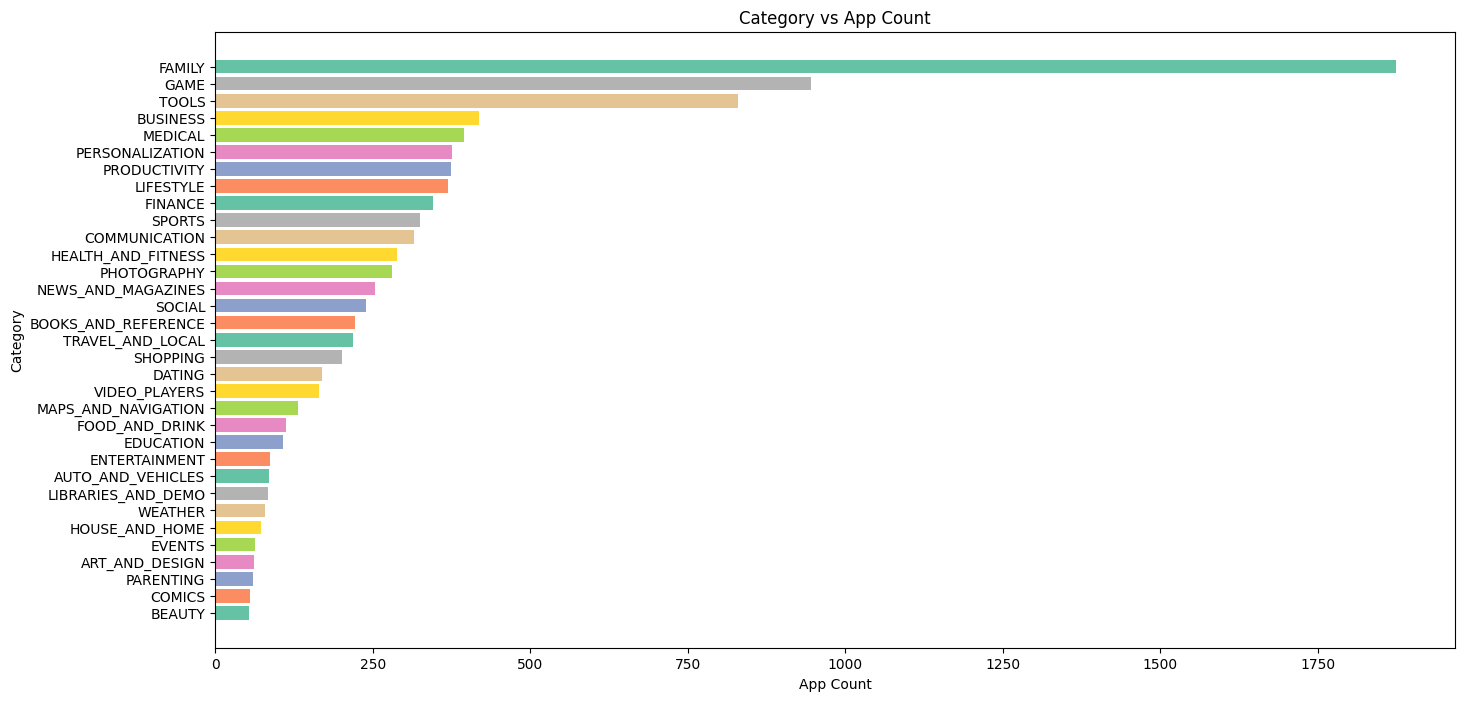

In [43]:
# Chart - 1 visualization code
plt.figure(figsize = (16,8))
sorted_df = category_summ.sort_values(by = 'app_count',ascending=True)
plt.barh(sorted_df['Category'], sorted_df['app_count'], color = sns.color_palette('Set2'))
plt.title('Category vs App Count')
plt.xlabel('App Count')
plt.ylabel('Category')

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing discrete categories. It clearly highlights differences in app count across categories, making competition levels easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that categories like FAMILY, GAME, and TOOLS are highly saturated, while several other categories have significantly fewer apps, indicating lower competition.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights help avoid overcrowded categories that may lead to poor growth and identify less saturated categories with better entry potential for new apps.Answer Here

#### Chart - 2

Text(0, 0.5, 'Category')

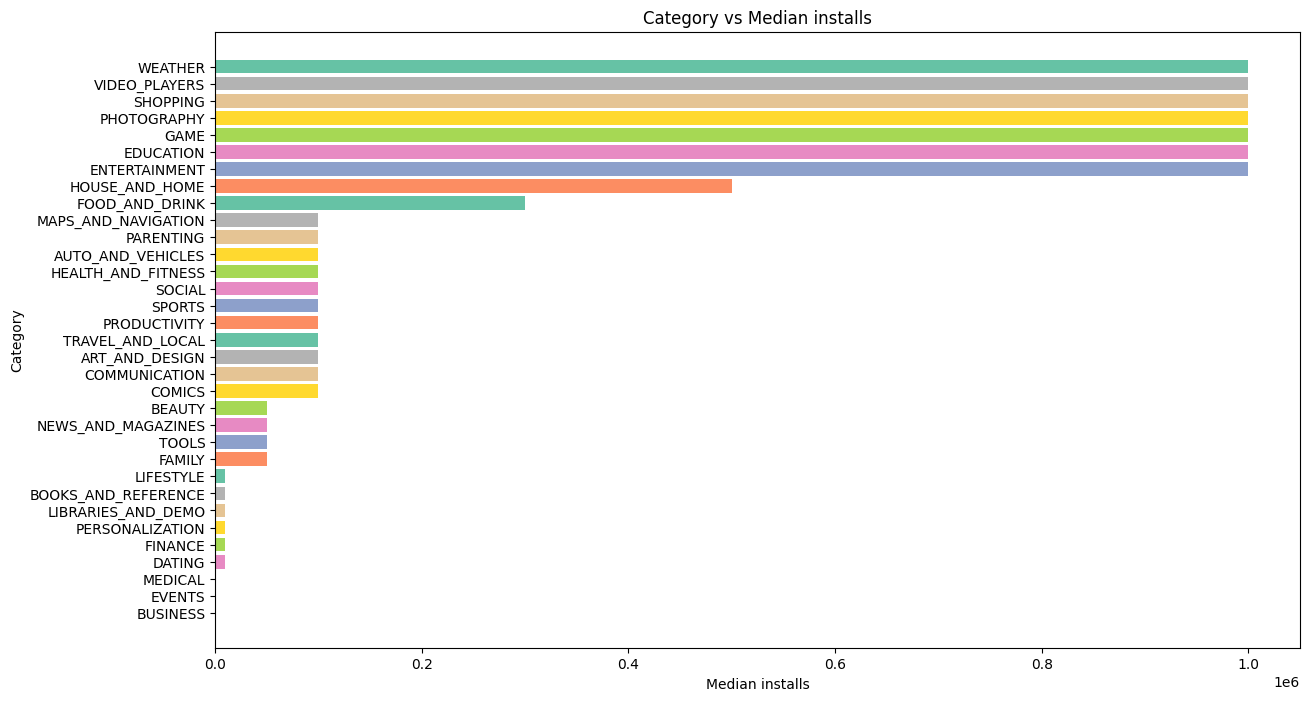

In [44]:
# Chart - 2 visualization code
plt.figure(figsize = (14,8))
sorted_df = category_summ.sort_values(by = 'Median_install',ascending=True)
plt.barh(sorted_df['Category'], sorted_df['Median_install'], color = sns.color_palette('Set2'))
plt.title('Category vs Median installs')
plt.xlabel('Median installs')
plt.ylabel('Category')

##### 1. Why did you pick the specific chart?

A bar chart was chosen to compare median installs across categories, as it effectively represents typical app performance while avoiding distortion from extreme outliers.

##### 2. What is/are the insight(s) found from the chart?

Categories such as VIDEO_PLAYERS, PHOTOGRAPHY, EDUCATION, and SHOPPING show high median installs, indicating that a typical app in these categories achieves strong adoption. In contrast, categories like BUSINESS, MEDICAL, and DATING show very low median installs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights help identify categories where a new app has a realistic chance of success. Categories with low median installs signal higher risk and may lead to poor growth due to weak user adoption.

#### Chart - 3

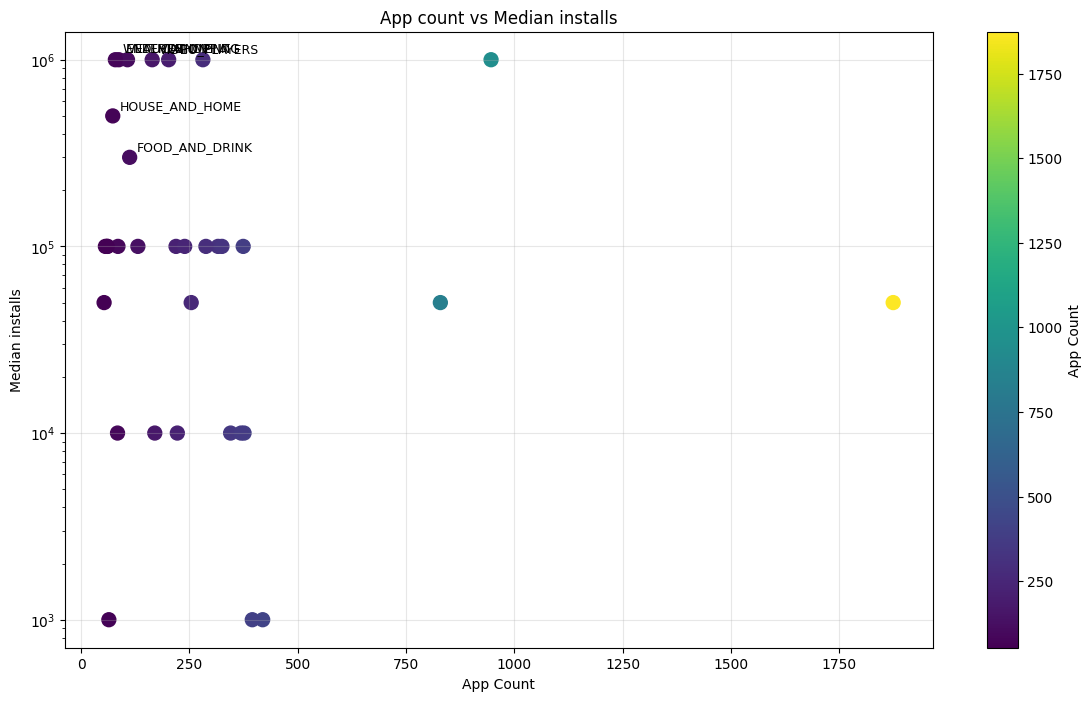

In [45]:
# Chart - 3 visualization code
plt.figure(figsize = (14,8))
sorted_df = category_summ.sort_values(by = 'Median_install',ascending=True)
plt.scatter(
    sorted_df['app_count'],
    sorted_df['Median_install'],
    c=sorted_df['app_count'],
    cmap='viridis',
    s=100
)
plt.colorbar(label='App Count')

plt.title('App count vs Median installs')
plt.xlabel('App Count')
plt.ylabel('Median installs')
top_opportunity = category_summ[
    (category_summ['Median_install'] >= category_summ['Median_install'].quantile(0.75)) &
    (category_summ['app_count'] <= category_summ['app_count'].quantile(0.5))
]

for _, row in top_opportunity.iterrows():
    plt.annotate(
        row['Category'],
        (row['app_count'], row['Median_install']),
        textcoords="offset points",
        xytext=(5, 5),
        fontsize=9
    )
plt.yscale('log')
plt.grid(alpha=0.3)


##### 1. Why did you pick the specific chart?

A scatter plot was used to simultaneously analyze competition (app count) and typical demand (median installs), enabling clear identification of opportunity and risk zones.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights categories with high demand and relatively low competition, indicating strong market opportunities, while heavily crowded categories with low median installs signal saturation risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This visualization helps prioritize high-opportunity categories and avoid saturated segments that may result in poor growth without significant differentiation.

#### Chart - 4

In [46]:
# Chart - 4 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [47]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [48]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [49]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [50]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [51]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [52]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [53]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [54]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [55]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [56]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

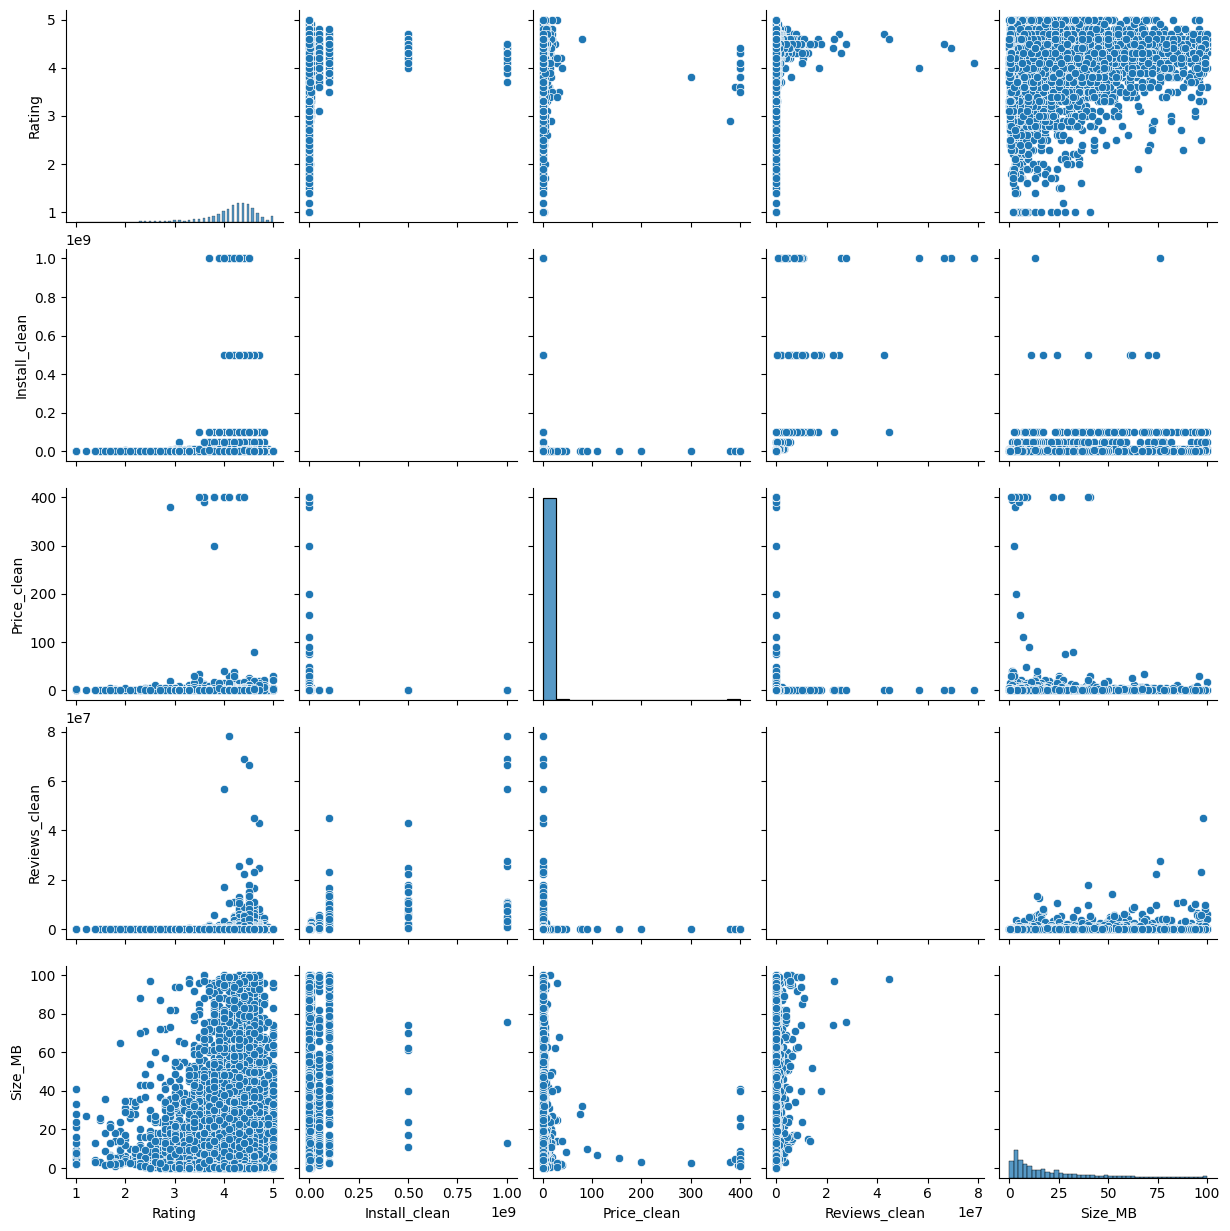

In [57]:
# Pair Plot visualization code
sns.pairplot(df1)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.